In [1]:
# This project demonstrates several important skills: 
# connecting to a MySQL database, fetching and storing data, performing data analysis, and visualizing results. 

In [2]:
!pip install sqlalchemy PyMySQL

In [3]:
!pip install sqlalchemy pymysql yfinance mysql-connector-python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import yfinance as yf

In [5]:
import mysql.connector
from sqlalchemy import create_engine


# MySQL connection parameters
username = 'root'      # Use your MySQL username
password = 'abcdefgh'  # Use your MySQL password instead of abcdefgh
host = 'localhost'
port = '3306'


# Create a connection to MySQL server (not specifying database)
conn = mysql.connector.connect(
    host=host,
    user=username,
    password=password
)

# Create a cursor object
cursor = conn.cursor()

# Create the database if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS stock_data")

# The first connection to the MySQL server is used to create the database if it doesn't exist 
# and then closed immediately.
# Close the cursor and connection
cursor.close()
conn.close()

database = 'stock_data'

# Connect to MySQL database
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)   

# Fetch historical stock data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Adj Close']
data.reset_index(inplace=True)


# Store data in MySQL
data.to_sql('stock_prices', con=engine, if_exists='replace', index=False)


[*********************100%***********************]  4 of 4 completed


1258

In [6]:
# Calculating Daily Returns and Storing in SQL

# Fetch data from SQL
query = "SELECT * FROM stock_prices"
data = pd.read_sql(query, con=engine)

# Calculate daily returns
data.set_index('Date', inplace=True)
daily_returns = data.pct_change().dropna().reset_index()

# Store daily returns in MySQL
daily_returns.to_sql('daily_returns', con=engine, if_exists='replace', index=False)

1257

In [7]:
daily_returns.head()

,Date,AAPL,AMZN,GOOGL,MSFT
0,2019-01-03,-0.099607,-0.025241,-0.027696,-0.036788
1,2019-01-04,0.042689,0.050064,0.051294,0.046509
2,2019-01-07,-0.002226,0.034353,-0.001994,0.001275
3,2019-01-08,0.019063,0.016612,0.008783,0.007251
4,2019-01-09,0.016982,0.001714,-0.003427,0.014299


In [8]:
daily_returns.describe()

,AAPL,AMZN,GOOGL,MSFT
count,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.001500,0.000787,0.000976,0.001271
std,0.020306,0.022187,0.020038,0.019207
min,-0.128647,-0.140494,-0.116342,-0.147390
25%,-0.008204,-0.010856,-0.008504,-0.008309
50%,0.001423,0.000955,0.001013,0.001250
75%,0.012431,0.012076,0.011037,0.011154
max,0.119808,0.135359,0.096202,0.142169


In [9]:
# # Redundant. We already saw the data directly. But this is showing how we can "query" the data from SQL.

# # Define the SQL query
# query = "SELECT * FROM daily_returns"

# # Fetch data from SQL into a Pandas DataFrame
# data = pd.read_sql(query, con=engine)

# data.head()

In [10]:
query = "SELECT * FROM daily_returns"


# Calculate correlations
correlations = data[['AAPL', 'MSFT', 'GOOGL', 'AMZN']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlations)

# Extract specific correlations
corr_AAPL_MSFT = correlations.loc['AAPL', 'MSFT']
corr_AAPL_GOOGL = correlations.loc['AAPL', 'GOOGL']
corr_AAPL_AMZN = correlations.loc['AAPL', 'AMZN']
corr_MSFT_GOOGL = correlations.loc['MSFT', 'GOOGL']
corr_MSFT_AMZN = correlations.loc['MSFT', 'AMZN']
corr_GOOGL_AMZN = correlations.loc['GOOGL', 'AMZN']

# Print specific correlations
print(f"\nSpecific Correlations:")
print(f"Correlation between AAPL and MSFT: {corr_AAPL_MSFT}")
print(f"Correlation between AAPL and GOOGL: {corr_AAPL_GOOGL}")
print(f"Correlation between AAPL and AMZN: {corr_AAPL_AMZN}")
print(f"Correlation between MSFT and GOOGL: {corr_MSFT_GOOGL}")
print(f"Correlation between MSFT and AMZN: {corr_MSFT_AMZN}")
print(f"Correlation between GOOGL and AMZN: {corr_GOOGL_AMZN}")


Correlation Matrix:
           AAPL      MSFT     GOOGL      AMZN
AAPL   1.000000  0.971695  0.903117  0.555312
MSFT   0.971695  1.000000  0.941835  0.596724
GOOGL  0.903117  0.941835  1.000000  0.671626
AMZN   0.555312  0.596724  0.671626  1.000000

Specific Correlations:
Correlation between AAPL and MSFT: 0.9716952976454025
Correlation between AAPL and GOOGL: 0.9031172273608529
Correlation between AAPL and AMZN: 0.5553118047229125
Correlation between MSFT and GOOGL: 0.9418347986326269
Correlation between MSFT and AMZN: 0.596724479825867
Correlation between GOOGL and AMZN: 0.6716260954320402


In [11]:
# Define and execute the query to calculate the average of AAPL
query1 = """
    SELECT AVG(AAPL) AS avg_AAPL, 
           AVG(MSFT) AS avg_MSFT, 
           AVG(GOOGL) AS avg_GOOGL, 
           AVG(AMZN) AS avg_AMZN
    FROM daily_returns;
"""

# Fetch the result into a DataFrame
avg_df = pd.read_sql(query, con=engine)

avg_df


,Date,AAPL,AMZN,GOOGL,MSFT
0,2019-01-03,-0.099607,-0.025241,-0.027696,-0.036788
1,2019-01-04,0.042689,0.050064,0.051294,0.046509
2,2019-01-07,-0.002226,0.034353,-0.001994,0.001275
3,2019-01-08,0.019063,0.016612,0.008783,0.007251
4,2019-01-09,0.016982,0.001714,-0.003427,0.014299
...,...,...,...,...,...
1252,2023-12-22,-0.005547,-0.002730,0.007620,0.002784
1253,2023-12-26,-0.002841,-0.000065,0.000212,0.000214
1254,2023-12-27,0.000518,-0.000456,-0.008126,-0.001575
1255,2023-12-28,0.002226,0.000261,-0.000997,0.003235


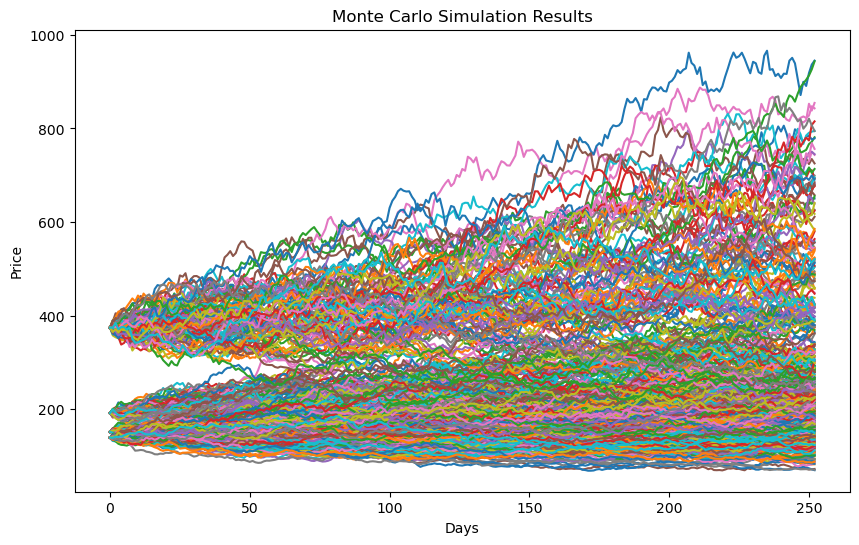

In [12]:
def monte_carlo_simulation(start_prices, days, mu, sigma, simulations=100):
    results = []
    for _ in range(simulations):
        prices = [start_prices]
        for _ in range(days):
            prices.append(prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal(size=len(start_prices))))
        results.append(prices)
    return np.array(results)

# Select the last available prices as the starting prices
start_prices = data.iloc[-1].values

# Number of days to simulate
days = 252  # 1 year

# Calculate mean and standard deviation of daily returns
mu = daily_returns.mean(numeric_only=True)
sigma = daily_returns.std(numeric_only=True)

# Run Monte Carlo simulation
simulations = monte_carlo_simulation(start_prices, days, mu, sigma)

# # Convert simulations to DataFrame
# simulations_df = pd.DataFrame(simulations.reshape(-1, simulations.shape[-1]))
# print(simulations_df)


plt.figure(figsize=(10, 6))
for simulation in simulations.T:
    plt.plot(simulation)
plt.title("Monte Carlo Simulation Results")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()